In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'

In [2]:
Cost= lambda x,K,s,k,v: v/k * (K + x**s)/ (K - x**s)

In [3]:
Crange = np.linspace(1,10,1000)
costs = {'c': [], 'cost_high': [], 'cost_low': []}
for c in Crange:
    cost1 = Cost(c,1,-1,1,1)
    cost2 = Cost(c,10,-1,1,1)
    
    costs['c'].append(c)
    costs['cost_high'].append(cost2)
    costs['cost_low'].append(cost1)
    
costs_df = pd.DataFrame(costs)

<ipython-input-2-9acf48e7adce>:1: RuntimeWarning: divide by zero encountered in double_scalars
  Cost= lambda x,K,s,k,v: v/k * (K + x**s)/ (K - x**s)


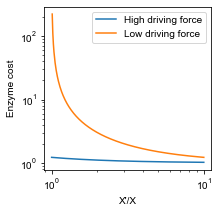

In [8]:
plt.figure(figsize=(3,3))

sns.lineplot(x='c',y='cost_high',data=costs_df)
sns.lineplot(x='c',y='cost_low',data=costs_df)
plt.yscale('log')
plt.legend(['High driving force','Low driving force'])
plt.xscale('log')
plt.xlabel("X'/X")
plt.ylabel('Enzyme cost')

plt.savefig('EnzymeCost_DrivingForces.svg')

In [9]:
Cost= lambda x,K,s,k,v,a: v/k * (a*(K + x[0]**s)/ (K - x[0]**s) + (1-a) * (K + x[1]**s)/ (K - x[1]**s))

In [40]:
x = [0.8,1.3]
arange = np.linspace(0,1,1000)
costs = {'a': [], 'cost_high': [], 'cost_low': []}

for a in arange:
    cost1 = Cost(x,1.5,1,1,1,a)
    cost2 = Cost(x,10,1,1,1,a)    
    costs['a'].append(a)
    costs['cost_high'].append(cost2)
    costs['cost_low'].append(cost1)
costs_dfd = pd.DataFrame(costs)  

<AxesSubplot:xlabel='a', ylabel='cost_high'>

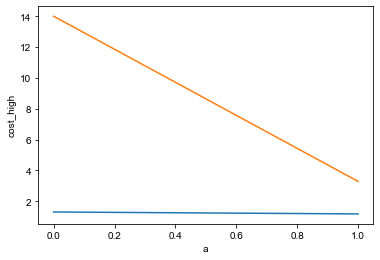

In [41]:
sns.lineplot(x='a',y='cost_high',data=costs_dfd)
sns.lineplot(x='a',y='cost_low',data=costs_dfd)

In [42]:
costs_dfd['high'] = costs_dfd.cost_high/costs_dfd.cost_high.max()
costs_dfd['low'] = costs_dfd.cost_low/costs_dfd.cost_low.max()

<AxesSubplot:xlabel='a', ylabel='high'>

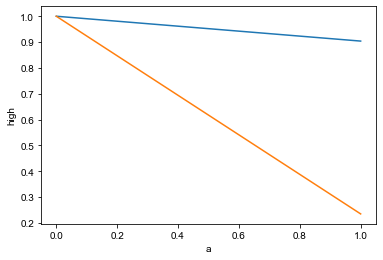

In [43]:
sns.lineplot(x='a',y='high',data=costs_dfd)
sns.lineplot(x='a',y='low',data=costs_dfd)

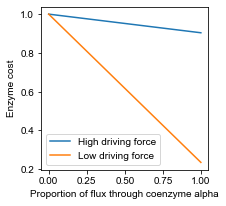

In [45]:
plt.figure(figsize=(3,3))

sns.lineplot(x='a',y='high',data=costs_dfd)
sns.lineplot(x='a',y='low',data=costs_dfd)
#plt.yscale('log')
plt.legend(['High driving force','Low driving force'])
#plt.xscale('log')
plt.xlabel("Proportion of flux through coenzyme alpha")
plt.ylabel('Enzyme cost')
plt.savefig('EnzymeCost_DrivingForces.MarginalBenefit.svg')